In [65]:
using Revise
using Scattering
using LinearAlgebra
using StaticArrays: SVector, SMatrix
using Distributions
import Plots
using Plots: plot, plot!
using LaTeXStrings
using Test

In [4]:
Plots.default(size=(600, 370))
fntf = :Helvetica
titlefont = Plots.font(fntf, pointsize=12)
guidefont = Plots.font(fntf, pointsize=12)
tickfont = Plots.font(fntf, pointsize=9)
legendfont = Plots.font(fntf, pointsize=8)
Plots.default(fontfamily=fntf)
Plots.default(titlefont=titlefont, guidefont=guidefont, tickfont=tickfont, legendfont=legendfont)
Plots.default(minorticks=true)
Plots.default(linewidth=1.2)
Plots.default(foreground_color_legend=nothing)

# Experiment on Computing Structure Factors

## Monodisperse Sphere in Simple Cubic

In [5]:
cfactor = 0.1;

In [6]:
# Create a Cubic UnitCell
a = 10.0
b = 10.0
c = 10.0
α = π/2
β = π/2
γ = π/2
uc = UnitCell(Vector3D(a,b,c), Vector3D(α,β,γ));

In [7]:
# Create a simple cubic crsytal lattice
lattice = BravaisLattice(Cubic(), :P, uc, SpaceGroup());

In [8]:
s = Sphere(1.0, 15.0, 15.0, RVector([0.0, 0.0, 0.0]))
# Create a monodisperse Sphere motif
m = Motif(s)
motifs = [transform(m, lattice.unitcell.shape, RCSpace)];

In [9]:
δ = 0.03
ν = 0.01
peak1 = peak(δ, ν);

In [10]:
σD = 0.06
dwfactor = DebyeWallerFactor(σD, lattice.unitcell.shape.l[1]);

In [11]:
# creat a single crystal
crystal = SingleCrystal(lattice, motifs, peak1, dwfactor);

In [12]:
qs = collect(range(0.4, 4, length=1000));

In [13]:
# compute the lattice factor of the crystal
Z0 = Z₀(crystal, qs, c=cfactor);

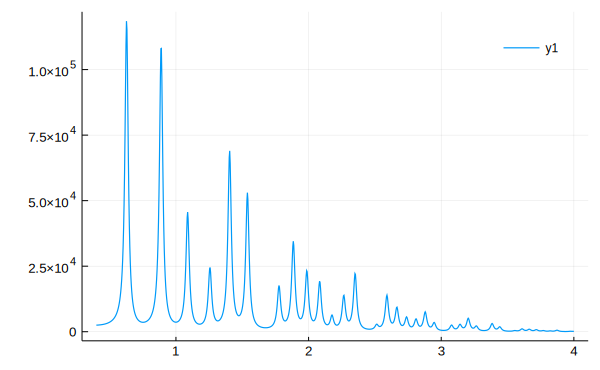

In [14]:
plot(qs, Z0)

In [15]:
# Compute the form factor of the crystal
P0 = P₀(crystal, qs);

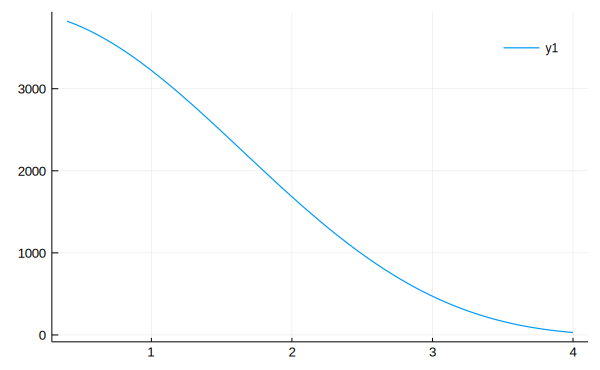

In [16]:
plot(qs, P0)

In [17]:
# Several ways to compute the ideal structure factor of a crystal
# S0 = S₀(crystal, qs);
# S0 = S₀(crystal, qs; Z0=Z0);
# S0 = S₀(crystal, qs; P0=P0);
S0 = S₀(crystal, qs; Z0=Z0, P0=P0);

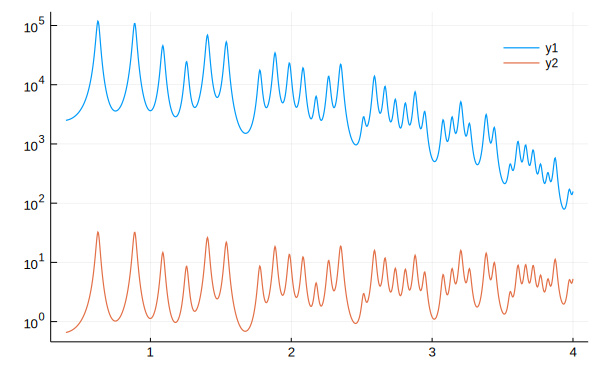

In [18]:
plot(qs, Z0, yaxis=:log)
plot!(qs, S0, yaxis=:log)

In [19]:
# Compute the sturcture factor of the crystal
S_sc = structurefactor(crystal, qs; Z0=Z0, P=P0, c=cfactor);

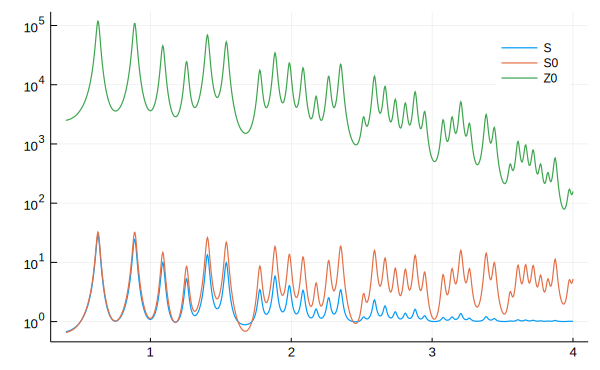

In [20]:
plot(qs, S_sc, yaxis=:log, label="S")
plot!(qs, S0, yaxis=:log, label="S0")
plot!(qs, Z0, yaxis=:log, label="Z0")

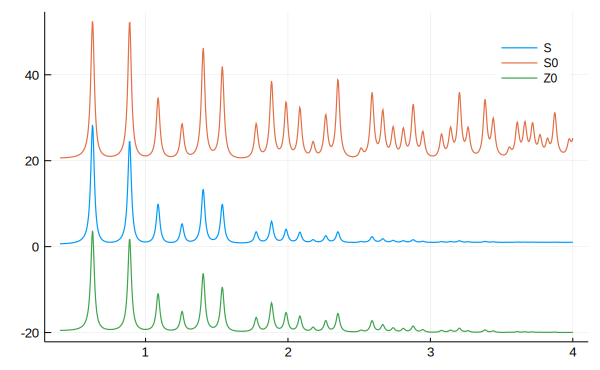

In [21]:
plot(qs, S_sc, label="S")
plot!(qs, S0.+20, label="S0")
plot!(qs, Z0/5e3.-20, label="Z0")

In [22]:
# Compute the beta ratio
β = βratio(crystal, qs)

1.0

## Polydisperse Sphere in Simple Cubic

In [23]:
# Create a polydisperse Sphere motif
μ1 = s.R
σ1 = 0.04
d1 = Normal(μ1, σ1)
a1 = μ1 - 2.5σ1
b1 = μ1 + 2.5σ1
pd = Dict(1=>d1)
lb = Dict(1=>a1)
ub = Dict(1=>b1)
m = Motif(s, pd, lb, ub)
motifs = [transform(m, lattice.unitcell.shape, RCSpace)];

In [24]:
# creat a single crystal filled with polydisperse spheres.
crystal = SingleCrystal(lattice, motifs, peak1, dwfactor);

In [25]:
# compute the lattice factor of the crystal
Z0_d = Z₀(crystal, qs, c=cfactor);

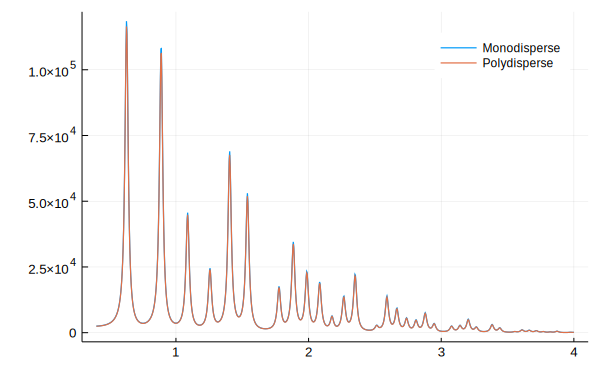

In [26]:
plot(qs, Z0, label="Monodisperse")
plot!(qs, Z0_d, label="Polydisperse")

In [27]:
# Compute the form factor of the crystal
P = formfactor(crystal, qs);

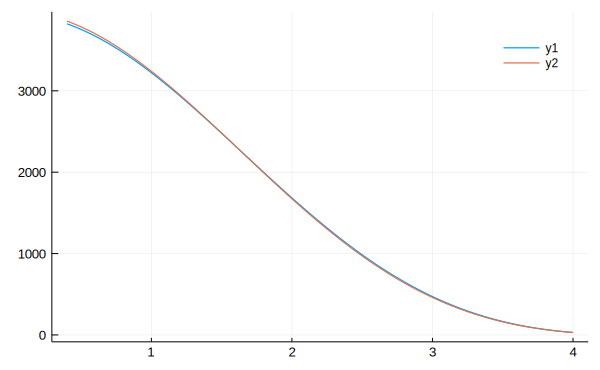

In [28]:
plot(qs, P0)
plot!(qs, P)

In [29]:
# Compute the beta ratio
β = βratio(crystal, qs; P=P);

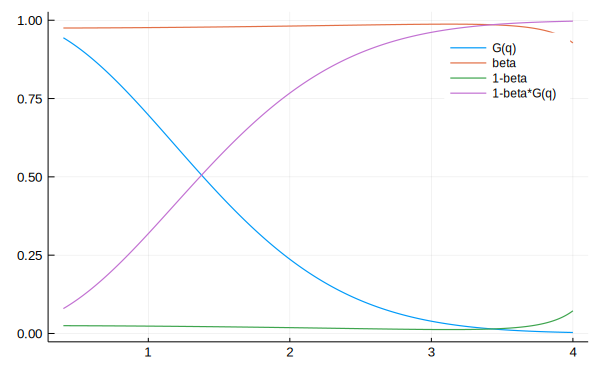

In [30]:
plot(qs, dwfactor(qs), label="G(q)")
plot!(qs, β, label="beta")
plot!(qs, 1 .- β, label="1-beta")
plot!(qs, 1 .- β.*dwfactor(qs), label="1-beta*G(q)")

In [31]:
# Compute the sturcture factor of the crystal
S_scp = structurefactor(crystal, qs; Z0=Z0, P=P, β=β, c=cfactor);

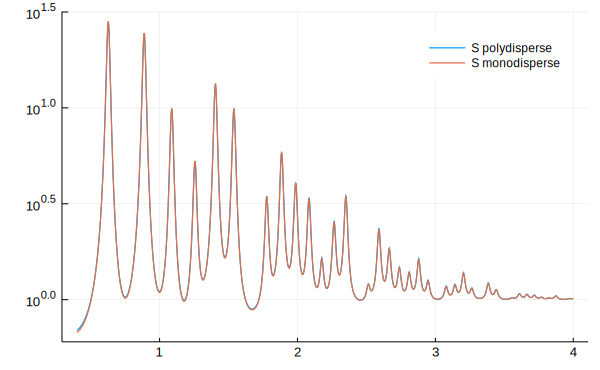

In [32]:
plot(qs, S_scp, label="S polydisperse", yaxis=:log)
plot!(qs, S_sc, label="S monodisperse", yaxis=:log)
# plot!(qs, Z0/5e3.-200, label="Z0")

## Monodisperse Spheres in BCC

In [33]:
# Create a BCC lattice
lattice = BravaisLattice(Cubic(), :I, uc, SpaceGroup());

In [34]:
s1 = Sphere(1.0, 15.0, 15.0, RVector([0.0, 0.0, 0.0]))
s2 = Sphere(1.0, 15.0, 15.0, RVector([0.5, 0.5, 0.5]))
# Create a monodisperse Sphere motif
# Note that the origin of Spheres are in RBSpace
m1 = Motif(s1);
m2 = Motif(s2);
# Have to convert the space to RCSpace first
motifs = [transform(m, lattice.unitcell.shape, RCSpace) for m in [m1, m2]];

In [35]:
# creat a single crystal
crystal = SingleCrystal(lattice, motifs, peak1, dwfactor);

In [36]:
# compute the lattice factor of the crystal
Z0 = Z₀(crystal, qs, c=cfactor);

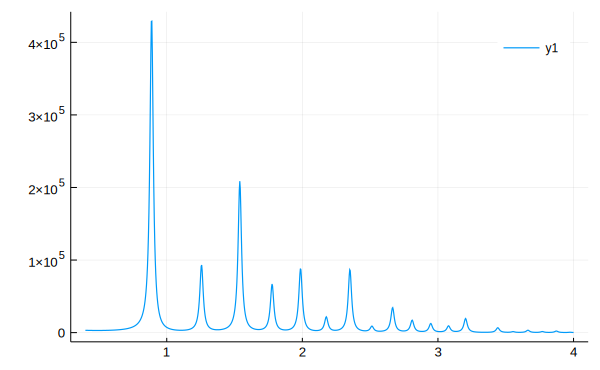

In [37]:
plot(qs, Z0)

In [38]:
# Compute the form factor of the crystal
P = formfactor(crystal, qs);

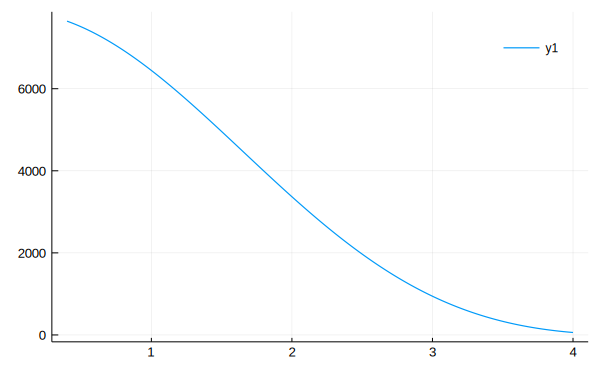

In [39]:
plot(qs, P)

In [40]:
# Compute the beta ratio
β = βratio(crystal, qs; P=P);
@test β ≈ 1.0

Test Passed

In [41]:
# Compute the sturcture factor of the crystal
S_bcc = structurefactor(crystal, qs; Z0=Z0, P=P, β=β, c=cfactor);

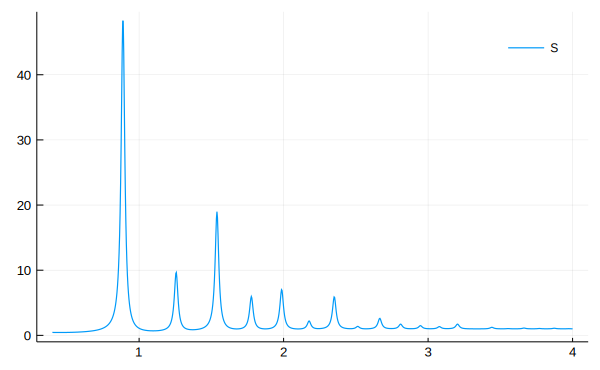

In [42]:
plot(qs, S_bcc, label="S")

## Monodisperse Spheres in FCC

In [43]:
# Create a BCC lattice
lattice = BravaisLattice(Cubic(), :F, uc, SpaceGroup());

In [44]:
s1 = Sphere(1.0, 15.0, 15.0, RVector([0.0, 0.0, 0.0]))
s2 = Sphere(1.0, 15.0, 15.0, RVector([0.5, 0.5, 0.0]))
s3 = Sphere(1.0, 15.0, 15.0, RVector([0.5, 0.0, 0.5]))
s4 = Sphere(1.0, 15.0, 15.0, RVector([0.0, 0.5, 0.5]))
# Create a monodisperse Sphere motif
# Note that the origin of Spheres are in RBSpace
m1 = Motif(s1);
m2 = Motif(s2);
m3 = Motif(s3);
m4 = Motif(s4);
# Have to convert the space to RCSpace first
motifs = [transform(m, lattice.unitcell.shape, RCSpace) for m in [m1, m2, m3, m4]];

In [45]:
# creat a single crystal
crystal = SingleCrystal(lattice, motifs, peak1, dwfactor);

In [46]:
# compute the lattice factor of the crystal
Z0 = Z₀(crystal, qs, c=cfactor);

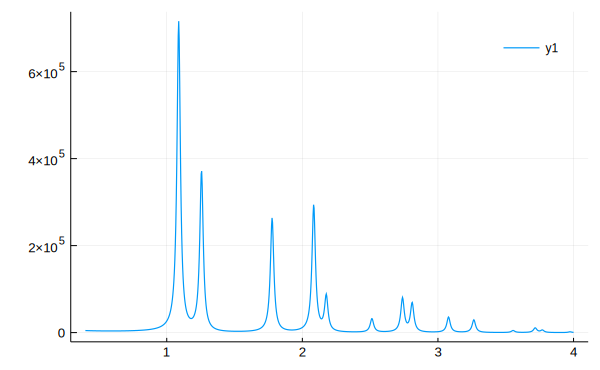

In [47]:
plot(qs, Z0)

In [48]:
# Compute the form factor of the crystal
P = formfactor(crystal, qs);

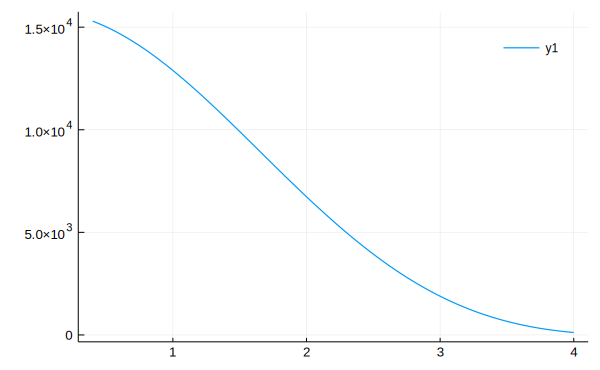

In [49]:
plot(qs, P)

In [50]:
# Compute the beta ratio
β = βratio(crystal, qs; P=P);
@test β ≈ 1.0

Test Passed

In [51]:
# Compute the sturcture factor of the crystal
S_fcc = structurefactor(crystal, qs; Z0=Z0, P=P, β=β, c=cfactor);

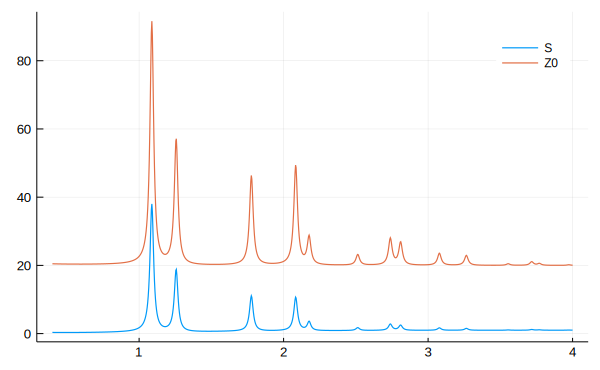

In [52]:
plot(qs, S_fcc, label="S")
plot!(qs, Z0/1e4.+20, label="Z0")

## Monodisperse Spheres in Diamond Lattice

In [53]:
# Create a Cubic UnitCell
a = 10.0 # unit can be nm
b = 10.0
c = 10.0
α = π/2
β = π/2
γ = π/2
uc = UnitCell(Vector3D(a,b,c), Vector3D(α,β,γ));

In [54]:
# Create a FCC lattice, SpaceGroup Fd-3m
# SpaceGroup is not implemented.
# Yet it is OK to compute the structure factor 
# as long as motifs are fully specified in the unit cell.
lattice = BravaisLattice(Cubic(), :F, uc, SpaceGroup());

In [55]:
# Create monodisperse Spheres in various positions.
# Note that the origin of Spheres are in RBSpace.
R, ρ, Δρ = 1.0, 15.0, 15.0 # unit can be nm for R
s1 = Sphere(R, ρ, Δρ, RVector([0.0, 0.0, 0.0]))
s2 = Sphere(R, ρ, Δρ, RVector([0.5, 0.5, 0.0]))
s3 = Sphere(R, ρ, Δρ, RVector([0.5, 0.0, 0.5]))
s4 = Sphere(R, ρ, Δρ, RVector([0.0, 0.5, 0.5]))
s5 = Sphere(R, ρ, Δρ, RVector([0.25, 0.25, 0.25]))
s6 = Sphere(R, ρ, Δρ, RVector([0.25, 0.75, 0.75]))
s7 = Sphere(R, ρ, Δρ, RVector([0.75, 0.25, 0.75]))
s8 = Sphere(R, ρ, Δρ, RVector([0.75, 0.75, 0.25]))
# Motif instances further provide the information of size polydispersity
m1 = Motif(s1);
m2 = Motif(s2);
m3 = Motif(s3);
m4 = Motif(s4);
m5 = Motif(s5);
m6 = Motif(s6);
m7 = Motif(s7);
m8 = Motif(s8);
# Have to convert the space to RCSpace first.
motifs = [transform(m, lattice.unitcell.shape, RCSpace) for m in [m1, m2, m3, m4, m5, m6, m7, m8]];

In [56]:
# creat a single crystal
crystal = SingleCrystal(lattice, motifs, peak1, dwfactor);

In [57]:
# compute the lattice factor of the crystal
Z0 = Z₀(crystal, qs, c=cfactor);

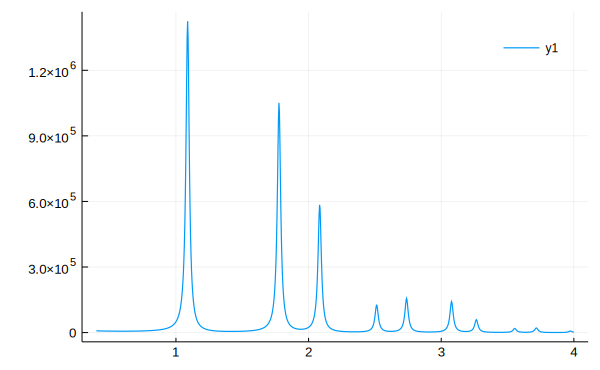

In [58]:
plot(qs, Z0)

In [59]:
# Compute the form factor of the crystal
P = formfactor(crystal, qs);

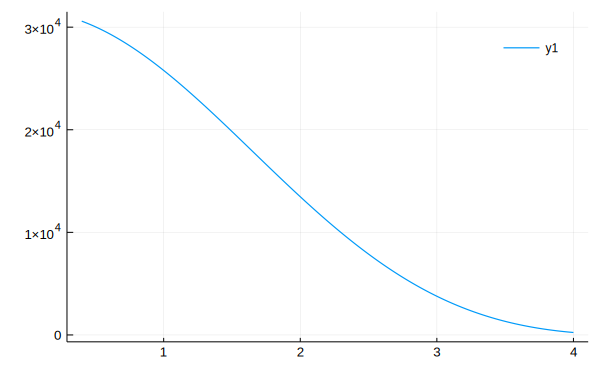

In [60]:
plot(qs, P)

In [61]:
# Compute the beta ratio
β = βratio(crystal, qs; P=P);
@test β ≈ 1.0

Test Passed

In [62]:
# Compute the sturcture factor of the crystal
S_diamond = structurefactor(crystal, qs; Z0=Z0, P=P, β=β, c=cfactor);

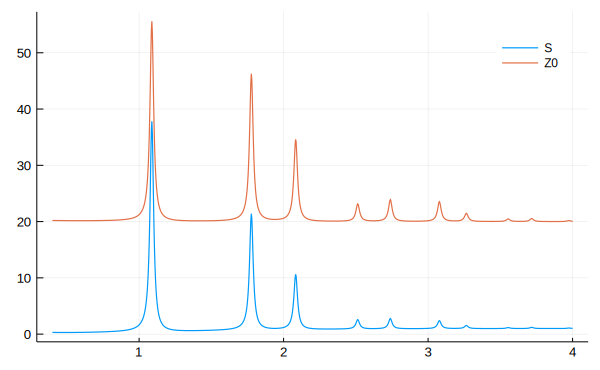

In [63]:
plot(qs, S_diamond, label="S")
plot!(qs, Z0/4e4.+20, label="Z0")

## Compare Structure Factors for Simple Cubic, BCC, FCC, and Diamond Lattices with Monodisperse Spheres

In [68]:
# Note the change of peak positions and relative peak intensities.
xlab = L"q"
ylab = L"S(q)"
plot(qs, S_sc, label="Simple Cubic", xlabel=xlab, ylabel=ylab)
plot!(qs, S_bcc.+20, label="BCC")
plot!(qs, S_fcc.+40, label="FCC")
plot!(qs, S_diamond.+60, label="Diamond")
Plots.savefig("/Users/lyx/Downloads/Sq.svg")